In [127]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import random #used for select random number
from sklearn.datasets import load_iris #used for load iris dataset
from sklearn.model_selection import train_test_split # used for split our dataset train-test (70% - 30%)
from sklearn.metrics import accuracy_score # used for get accuracy
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import scatterplotmatrix #used for plot scatter plot matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [128]:
#load_iris() function load iris dataset and creating pd dataframe
#after loading the dataset we create the pd dataframe
#not required, but the iris dataset is a series form when first loaded. Converting it to dataframe provides ease of operation

In [129]:
iris = load_iris() #load iris dataset and creating pd dataframe
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter) 
iris_df = pd.concat([iris_df, target_df], axis= 1) #concatenate the DataFrames

In [130]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [131]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


QUESTION-1

We draw the scatterplot matrix of the data set using the mlxtend.plotting library. This matrix gives us the opportunity to examine all combinations of each feature in the dataset. I also added the pairplot matrix below.

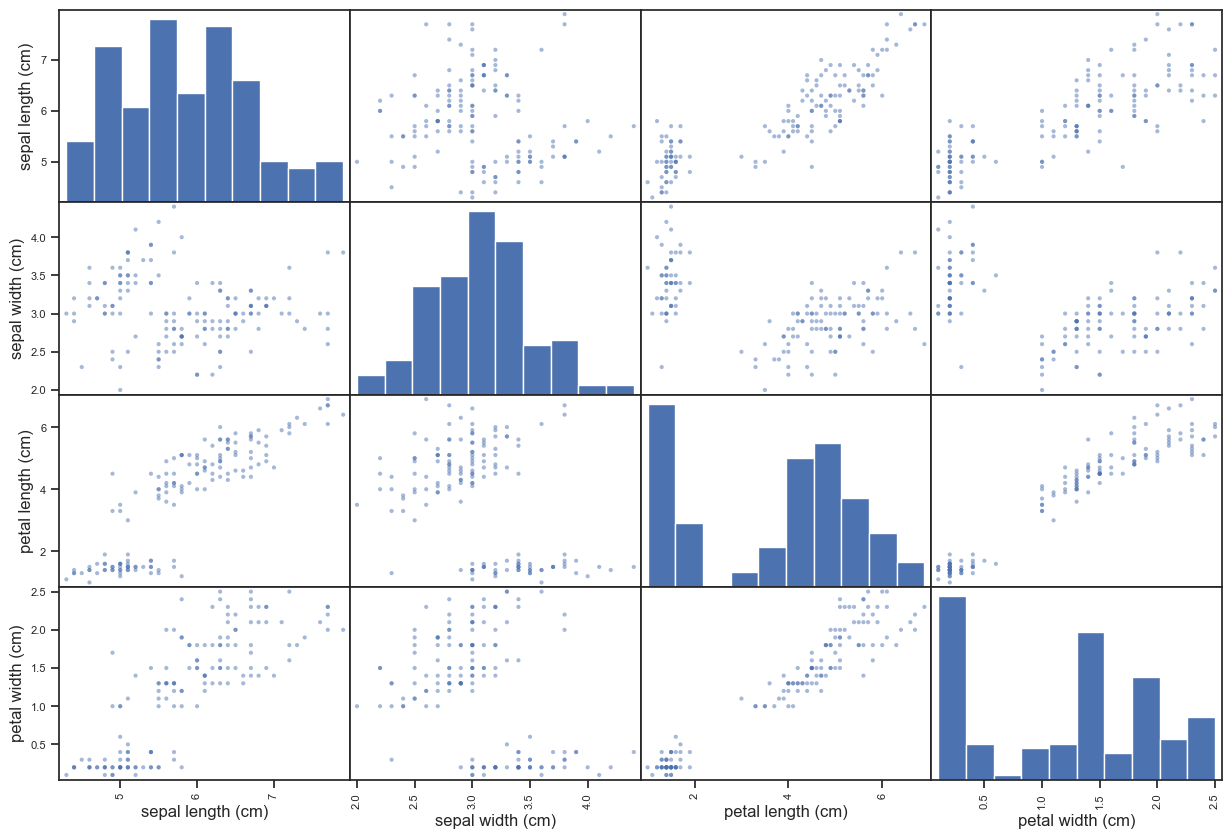

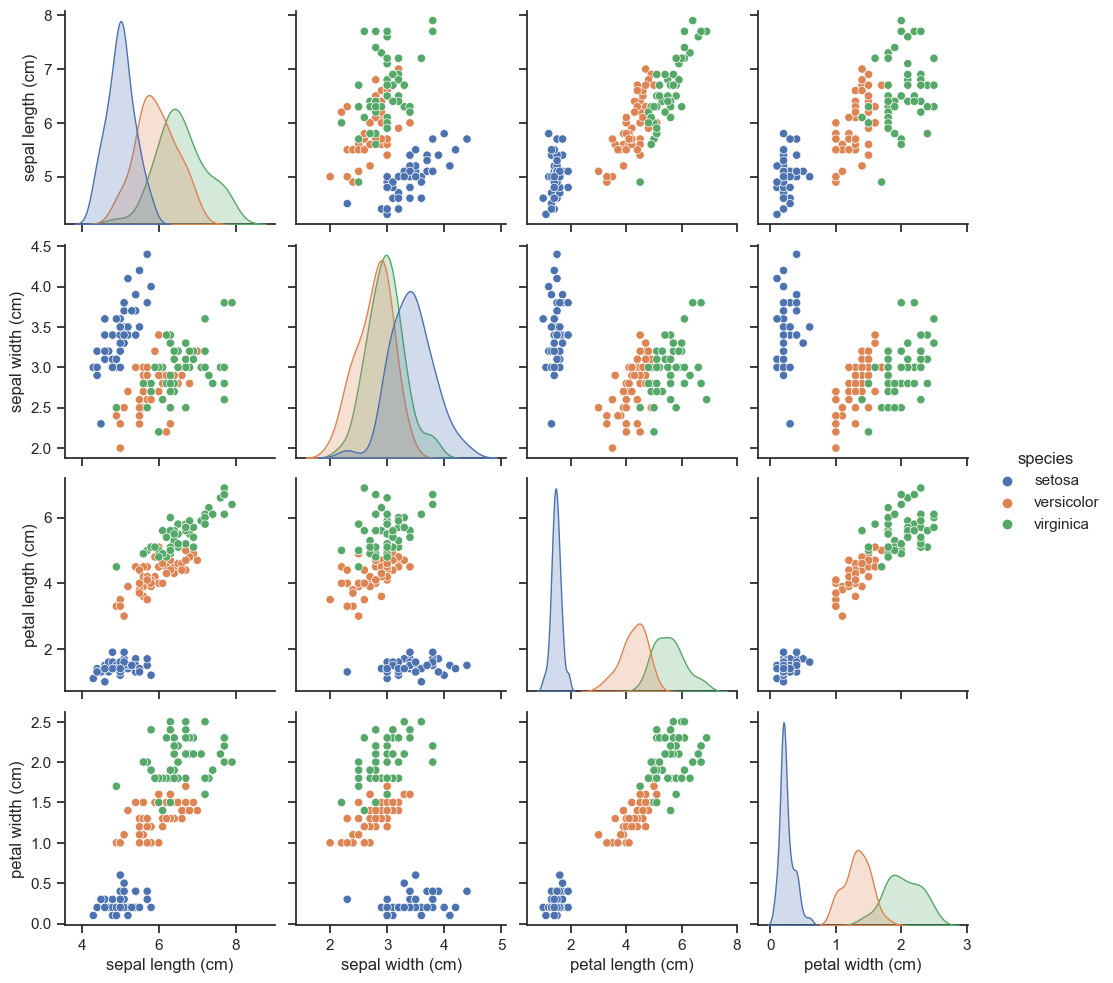

In [132]:
scatter=pd.plotting.scatter_matrix(iris_df.drop(labels= 'species', axis= 1), figsize=(15,10))
plt.show()
plt.close()
sns.set_theme(style="ticks")
sns.pairplot(iris_df, hue="species")
plt.show()

QUESTON-2

We first convert the iris flower species, which are setosa, versicolor and virginica, into a numerical form as 0,1,2, respectively. Then, in order to divide the dataset into train and test, we divide the dataset into datasets that contain only the features of the flower and only show the species of flower. After defining our variables in this way, we divide the dataset with a ratio of 70 to 30 using the train_test_split function of the sklearn library.

In [133]:
# Converting Objects to Numerical dtype
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [134]:
# Variables
X= iris_df.drop(labels= 'petal length (cm)', axis= 1)
Y= iris_df['petal length (cm)']
display(X)
display(Y)

,sepal length (cm),sepal width (cm),petal width (cm),species
0,5.1,3.5,0.2,0
1,4.9,3.0,0.2,0
2,4.7,3.2,0.2,0
3,4.6,3.1,0.2,0
4,5.0,3.6,0.2,0
...,...,...,...,...
145,6.7,3.0,2.3,2
146,6.3,2.5,1.9,2
147,6.5,3.0,2.0,2
148,6.2,3.4,2.3,2


0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

In [135]:
# Splitting the Dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 78)
#for checking
print("Shape X:",X.shape,
      "\nShape X_train:",X_train.shape,
      "\nShape X_test:",X_test.shape,
      "\n\nShape Y:",Y.shape,
      "\nShape Y_train:",Y_train.shape,
      "\nShape Y_test:",Y_test.shape)

Shape X: (150, 4) 
Shape X_train: (105, 4) 
Shape X_test: (45, 4) 

Shape Y: (150,) 
Shape Y_train: (105,) 
Shape Y_test: (45,)


In [136]:
display(X_train, X_test, Y_train, Y_test)

,sepal length (cm),sepal width (cm),petal width (cm),species
45,4.8,3.0,0.3,0
9,4.9,3.1,0.1,0
37,4.9,3.6,0.1,0
148,6.2,3.4,2.3,2
5,5.4,3.9,0.4,0
...,...,...,...,...
116,6.5,3.0,1.8,2
29,4.7,3.2,0.2,0
54,6.5,2.8,1.5,1
105,7.6,3.0,2.1,2


,sepal length (cm),sepal width (cm),petal width (cm),species
128,6.4,2.8,2.1,2
131,7.9,3.8,2.0,2
145,6.7,3.0,2.3,2
50,7.0,3.2,1.4,1
95,5.7,3.0,1.2,1
94,5.6,2.7,1.3,1
99,5.7,2.8,1.3,1
33,5.5,4.2,0.2,0
61,5.9,3.0,1.5,1
144,6.7,3.3,2.5,2


45     1.4
9      1.5
37     1.4
148    5.4
5      1.7
      ... 
116    5.5
29     1.6
54     4.6
105    6.6
40     1.3
Name: petal length (cm), Length: 105, dtype: float64

128    5.6
131    6.4
145    5.2
50     4.7
95     4.2
94     4.2
99     4.1
33     1.4
61     4.2
144    5.7
126    4.8
70     4.8
129    5.8
30     1.6
53     4.0
71     4.0
75     4.4
81     3.7
19     1.5
15     1.5
42     1.3
83     5.1
121    4.9
34     1.5
91     4.6
57     3.3
56     4.7
7      1.5
87     4.4
109    6.1
122    6.7
140    5.6
100    6.0
79     3.5
21     1.5
4      1.4
124    5.7
2      1.3
63     4.7
39     1.5
74     4.3
130    6.1
117    6.7
89     4.0
127    4.9
Name: petal length (cm), dtype: float64

QUESTION-3

Linear regressions are about finding a best fit linear line (usually judged by the R squared metric) through a set of data points. LinearRegression() can be thought of as setting up a ‘blank’ linear regression model which contains no parameters. Calling the .fit(x_train, y_train) method on the linear regression object uses the training data set and labels to generate parameters for the object.

In [137]:
lr = LinearRegression() #instantiating linearRegression() model
lr.fit(X_train, Y_train) #training/fitting the model
pred = lr.predict(X_test) #making predictions
print (lr.intercept_)
print (lr.coef_)

-0.11404381762192806
[ 0.66999108 -0.56986337  0.94335555  0.54739978]


QUESTON-4

The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset.

In [138]:
print('Predicted Petal Lengths (cm):\n', Y_test)
print('\nActual Petal Lengths (cm):\n', pred)

Predicted Petal Lengths (cm):
 128    5.6
131    6.4
145    5.2
50     4.7
95     4.2
94     4.2
99     4.1
33     1.4
61     4.2
144    5.7
126    4.8
70     4.8
129    5.8
30     1.6
53     4.0
71     4.0
75     4.4
81     3.7
19     1.5
15     1.5
42     1.3
83     5.1
121    4.9
34     1.5
91     4.6
57     3.3
56     4.7
7      1.5
87     4.4
109    6.1
122    6.7
140    5.6
100    6.0
79     3.5
21     1.5
4      1.4
124    5.7
2      1.3
63     4.7
39     1.5
74     4.3
130    6.1
117    6.7
89     4.0
127    4.9
Name: petal length (cm), dtype: float64

Actual Petal Lengths (cm):
 [5.65412787 5.99491557 5.92982363 4.62042851 3.67474167 3.87303713
 3.8830499  1.36615208 4.09174655 5.94753573 5.23712299 4.26078054
 5.60447029 1.52400803 4.03398337 4.15104633 4.46640475 3.69399037
 1.42043655 1.57484874 1.19902526 4.42404022 5.02379946 1.59100714
 4.13140921 3.29199572 4.28311953 1.48704724 4.56997623 6.11157226
 6.43078072 5.96717285 5.6795393  3.71401591 1.57175845 1.37307456
 5.

In [139]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(Y_test, pred))
print('Mean Squared Error:', mean_squared_error(Y_test, pred))

Mean Absolute Error: 0.21019620447423648
Mean Squared Error: 0.08439606039186855


QUESTION-5

Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

In [140]:
rnd=random.randrange(0, 44, 1)
ac=Y_test.iloc[rnd]
pr=pred[rnd]
print('Predicted Petal Lengths (cm):', ac)
print('Actual Petal Lengths (cm):', pr)
print('The difference between the predicted and actual values (cm):', ac-pr)
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(Y_test, pred)))

Predicted Petal Lengths (cm): 5.1
Actual Petal Lengths (cm): 4.424040223958452
The difference between the predicted and actual values (cm): 0.6759597760415472
Mean Root Squared Error: 0.2905100005023382


QUESTION-6

The general equation of a straight line is:y = mx + q. Where “m” is called angular coefficient and “q” intercept. When we apply a linear fit, we are basically searching the values for the parameters “m” and “q” that yield the best fit for our data points. The .polyfit() function, accepts three different input values: x, y and the polynomial degree. The outputs of the polyfit() function will be a list containing the fitting parameters; the first is the one that in the function is multiplied by the highest degree term; the others then follow this order. 

In [141]:
x=iris_df['petal length (cm)']
y=iris_df['petal width (cm)']
fit = np.polyfit(x,y,1) #applying a linear fit with .polyfit()
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept #obtaining the y axis values for the fitting function

print('mx + b = 0\nm:', fit[0], "\nn:", fit[1])
print('\nIf this equation is applied for all x values, the outputs will be as follows\n', fit_eq)

mx + b = 0
m: 0.41575541635241153 
n: -0.36307552131902887

If this equation is applied for all x values, the outputs will be as follows
 0      0.218982
1      0.218982
2      0.177407
3      0.260558
4      0.218982
         ...   
145    1.798853
146    1.715702
147    1.798853
148    1.882004
149    1.757277
Name: petal length (cm), Length: 150, dtype: float64


QUESTION-7

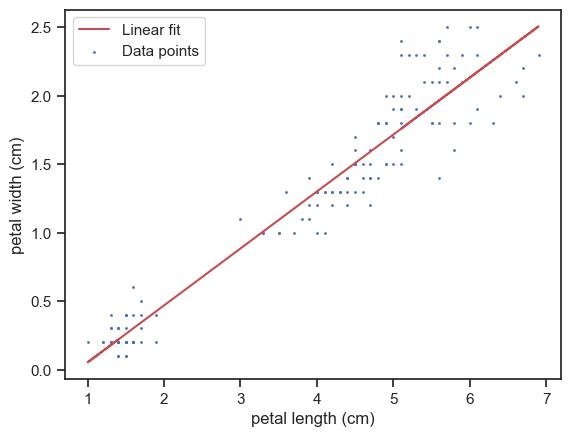

In [142]:
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', label = 'Linear fit')
ax.scatter(x,y,1, color = 'b', label = 'Data points') #original data points
ax.legend()
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
plt.show()

QUESTION-8

R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s).

In [143]:
predict = np.poly1d(fit)
r2_score(y, predict(x))

0.9271098389904927

QUESTION-9

The general equation is:y = ax2 + bx + c. Where a, b and c are the equation parameters that we estimate when generating a fitting function. 

In [144]:
fit1 = np.polyfit(x, y, 2)
a = fit1[0]
b = fit1[1]
c = fit1[2]
fit_eq1 = a*np.square(x) + b*x + c

print('ax^2 + bx + c = 0\na:', fit1[0], "\nb:", fit1[1], "\nc:", fit1[2])
print('\nIf this equation is applied for all x values, the outputs will be as follows\n', fit_eq1)

ax^2 + bx + c = 0
a: -0.002568924187587062 
b: 0.4338334945429677 
c: -0.3867810312356536

If this equation is applied for all x values, the outputs will be as follows
 0      0.215551
1      0.215551
2      0.172861
3      0.258189
4      0.215551
         ...   
145    1.799689
146    1.718163
147    1.799689
148    1.881010
149    1.758952
Name: petal length (cm), Length: 150, dtype: float64


QUESTION-10

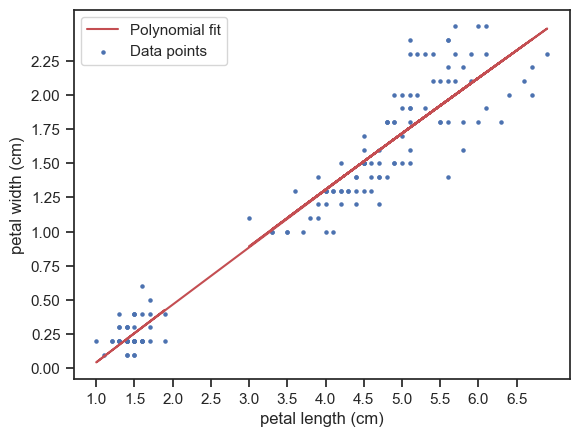

In [145]:
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_eq1, color = 'r', label = 'Polynomial fit')
ax1.scatter(x, y, 5, color = 'b', label = 'Data points')
ax1.legend()
plt.ylabel('petal width (cm)')
plt.xlabel('petal length (cm)')
ax1.set_xticks(np.arange(1, 7, 0.5))
ax1.set_yticks(np.arange(0, max(y), 0.25))
plt.show()